In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense , Dropout
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [114]:
def splitData(X,Y,rate):
  X_train = X[:int(X.shape[0]*rate)]
  Y_train = Y[:int(Y.shape[0]*rate)]
  X_val = X[int(X.shape[0]*rate):]
  Y_val = Y[int(Y.shape[0]*rate)-1:]
  return X_train, Y_train, X_val, Y_val

df = pd.read_csv("data/2330_indicators.csv")
X_train = df[:-1].values

y_train = df.loc[1:,['closed']].values
X_train , Y_train , X_val , Y_val = splitData(X_train,y_train,0.8)
print(X_val.shape,Y_val.shape)

(1258, 10) (1259, 1)


In [134]:
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_val_sc = sc_X.transform(X_val)
sc_Y = MinMaxScaler()
Y_train_sc = sc_Y.fit_transform(Y_train)
Y_val_sc = sc_Y.transform(Y_val)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [124]:
X_train_steps = []
Y_train_steps = []
for i in range(20, len(X_train_sc)):  # 1258 是訓練集總數
    X_train_steps.append(X_train_sc[i-20:i])
    Y_train_steps.append(Y_train_sc[i])
X_train, Y_train = np.array(X_train_steps), np.array(Y_train_steps)

X_val_steps = []
Y_val_steps = []
for i in range(20,len(X_val_sc)):
    X_val_steps.append(X_val_sc[i-20:i])
    Y_val_steps.append(Y_val_sc[i])
X_val , Y_val = np.array(X_val_steps) , np.array(Y_val_steps)

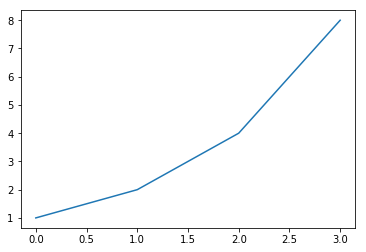

In [125]:
plt.plot([1,2,4,8])

In [126]:

#X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
#X_val = np.reshape(X_val,(X_val.shape[0], 1,1))

model_lstm = Sequential()
model_lstm.add(LSTM(128,input_shape=X_train.shape[1:],activation='relu',kernel_initializer='lecun_uniform',return_sequences=True)) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(128,return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(128,return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(128,return_sequences=False))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(1))
model_lstm.summary()
model_lstm.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 20, 128)           71168     
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 128)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 20, 128)           131584    
_________________________________________________________________
dropout_17 (Dropout)         (None, 20, 128)           0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 20, 128)           131584    
_________________________________________________________________
dropout_18 (Dropout)         (None, 20, 128)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 128)               131584    
__________

In [133]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history_model_lstm = model_lstm.fit(X_train, Y_train, epochs=3000, batch_size=100, shuffle=False,validation_data=(X_val,Y_val))

y_pred_test_lstm = model_lstm.predict(X_val)
print(y_pred_test_lstm)
y_train_pred_lstm = model_lstm.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_train, y_train_pred_lstm)))
r2_train = r2_score(Y_train, y_train_pred_lstm)

Train on 5008 samples, validate on 1238 samples
Epoch 1/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0028 - acc: 3.9936e-04 - val_loss: 0.0270 - val_acc: 0.0032
Epoch 2/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0025 - acc: 3.9936e-04 - val_loss: 0.0198 - val_acc: 0.0032
Epoch 3/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0020 - acc: 3.9936e-04 - val_loss: 0.0122 - val_acc: 0.0032
Epoch 4/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0018 - acc: 3.9936e-04 - val_loss: 0.0108 - val_acc: 0.0032
Epoch 5/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0029 - acc: 3.9936e-04 - val_loss: 0.0125 - val_acc: 0.0032
Epoch 6/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0044 - acc: 3.9936e-04 - val_loss: 0.0214 - val_acc: 0.0032
Epoch 7/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0062 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 0.0017 - acc: 3.9936e-04 - val_loss: 0.0237 - val_acc: 0.0032
Epoch 59/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0013 - acc: 3.9936e-04 - val_loss: 0.0252 - val_acc: 0.0032
Epoch 60/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0013 - acc: 3.9936e-04 - val_loss: 0.0091 - val_acc: 0.0032
Epoch 61/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0015 - acc: 3.9936e-04 - val_loss: 0.0171 - val_acc: 0.0032
Epoch 62/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0034 - acc: 3.9936e-04 - val_loss: 0.0141 - val_acc: 0.0032
Epoch 63/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0038 - acc: 3.9936e-04 - val_loss: 0.0262 - val_acc: 0.0032
Epoch 64/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0028 - acc: 3.9936e-04 - val_loss: 0.0281 - val_acc: 0.0032
Epoch 65/3000
5008/5008 [==

Epoch 116/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0169 - val_acc: 0.0032
Epoch 117/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0017 - acc: 3.9936e-04 - val_loss: 0.0418 - val_acc: 0.0032
Epoch 118/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0013 - acc: 3.9936e-04 - val_loss: 0.0183 - val_acc: 0.0032
Epoch 119/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0016 - acc: 3.9936e-04 - val_loss: 0.0479 - val_acc: 0.0032
Epoch 120/3000
5008/5008 [==============================] - 11s 2ms/step - loss: 0.0017 - acc: 3.9936e-04 - val_loss: 0.0201 - val_acc: 0.0032
Epoch 121/3000
5008/5008 [==============================] - 12s 2ms/step - loss: 0.0020 - acc: 3.9936e-04 - val_loss: 0.0579 - val_acc: 0.0032
Epoch 122/3000
5008/5008 [==============================] - 11s 2ms/step - loss: 0.0019 - acc: 3.9936e-04 - val_loss: 0.0126 - val_acc: 0.0032

5008/5008 [==============================] - 10s 2ms/step - loss: 0.0010 - acc: 3.9936e-04 - val_loss: 0.0481 - val_acc: 0.0032
Epoch 174/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0012 - acc: 3.9936e-04 - val_loss: 0.0162 - val_acc: 0.0032
Epoch 175/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0017 - acc: 3.9936e-04 - val_loss: 0.0333 - val_acc: 0.0032
Epoch 176/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0014 - acc: 3.9936e-04 - val_loss: 0.0147 - val_acc: 0.0032
Epoch 177/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0015 - acc: 3.9936e-04 - val_loss: 0.0576 - val_acc: 0.0032
Epoch 178/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0012 - acc: 3.9936e-04 - val_loss: 0.0259 - val_acc: 0.0032
Epoch 179/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0015 - acc: 3.9936e-04 - val_loss: 0.0382 - val_acc: 0.0032
Epoch 180/3000

5008/5008 [==============================] - 10s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0079 - val_acc: 0.0032
Epoch 231/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0016 - acc: 3.9936e-04 - val_loss: 0.0163 - val_acc: 0.0032 acc:
Epoch 232/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0022 - acc: 3.9936e-04 - val_loss: 0.0243 - val_acc: 0.0032
Epoch 233/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0032 - acc: 3.9936e-04 - val_loss: 0.0111 - val_acc: 0.0032
Epoch 234/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0035 - acc: 3.9936e-04 - val_loss: 0.0110 - val_acc: 0.0032
Epoch 235/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0033 - acc: 3.9936e-04 - val_loss: 0.0237 - val_acc: 0.0032
Epoch 236/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0022 - acc: 3.9936e-04 - val_loss: 0.0160 - val_acc: 0.0032
Epoch 237

5008/5008 [==============================] - 10s 2ms/step - loss: 8.7119e-04 - acc: 3.9936e-04 - val_loss: 0.0208 - val_acc: 0.0032
Epoch 287/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0012 - acc: 3.9936e-04 - val_loss: 0.0160 - val_acc: 0.0032
Epoch 288/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 9.0056e-04 - acc: 3.9936e-04 - val_loss: 0.0111 - val_acc: 0.0032
Epoch 289/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 0.0017 - acc: 3.9936e-04 - val_loss: 0.0100 - val_acc: 0.0032
Epoch 290/3000
5008/5008 [==============================] - 11s 2ms/step - loss: 7.9755e-04 - acc: 3.9936e-04 - val_loss: 0.0280 - val_acc: 0.0032
Epoch 291/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 9.3566e-04 - acc: 3.9936e-04 - val_loss: 0.0329 - val_acc: 0.0032
Epoch 292/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.8518e-04 - acc: 3.9936e-04 - val_loss: 0.0221 - val_acc: 0.

Epoch 343/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0013 - acc: 3.9936e-04 - val_loss: 0.0138 - val_acc: 0.0032
Epoch 344/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0014 - acc: 3.9936e-04 - val_loss: 0.0140 - val_acc: 0.0032
Epoch 345/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0252 - val_acc: 0.0032
Epoch 346/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0497 - val_acc: 0.0032
Epoch 347/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0286 - val_acc: 0.0032
Epoch 348/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 8.4715e-04 - acc: 3.9936e-04 - val_loss: 0.0449 - val_acc: 0.0032
Epoch 349/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.8294e-04 - acc: 3.9936e-04 - val_loss: 0.0089 - val_acc: 0.003

5008/5008 [==============================] - 9s 2ms/step - loss: 9.7671e-04 - acc: 3.9936e-04 - val_loss: 0.0155 - val_acc: 0.0032
Epoch 401/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 8.4129e-04 - acc: 3.9936e-04 - val_loss: 0.0206 - val_acc: 0.0032
Epoch 402/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 7.0941e-04 - acc: 3.9936e-04 - val_loss: 0.0295 - val_acc: 0.0032
Epoch 403/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 7.9386e-04 - acc: 3.9936e-04 - val_loss: 0.0236 - val_acc: 0.0032
Epoch 404/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.7251e-04 - acc: 3.9936e-04 - val_loss: 0.0175 - val_acc: 0.0032
Epoch 405/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.0998e-04 - acc: 3.9936e-04 - val_loss: 0.0123 - val_acc: 0.0032
Epoch 406/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 7.4126e-04 - acc: 3.9936e-04 - val_loss: 0.0120 - val_ac

Epoch 456/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 7.8595e-04 - acc: 3.9936e-04 - val_loss: 0.0270 - val_acc: 0.0032
Epoch 457/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.4442e-04 - acc: 3.9936e-04 - val_loss: 0.0366 - val_acc: 0.0032
Epoch 458/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.7173e-04 - acc: 3.9936e-04 - val_loss: 0.0448 - val_acc: 0.0032
Epoch 459/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.0090e-04 - acc: 3.9936e-04 - val_loss: 0.0572 - val_acc: 0.0032
Epoch 460/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 8.0927e-04 - acc: 3.9936e-04 - val_loss: 0.0255 - val_acc: 0.0032
Epoch 461/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0012 - acc: 3.9936e-04 - val_loss: 0.0083 - val_acc: 0.0032
Epoch 462/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0103 - v

5008/5008 [==============================] - 9s 2ms/step - loss: 6.9203e-04 - acc: 3.9936e-04 - val_loss: 0.0352 - val_acc: 0.0032
Epoch 513/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.8820e-04 - acc: 3.9936e-04 - val_loss: 0.0159 - val_acc: 0.0032
Epoch 514/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.7999e-04 - acc: 3.9936e-04 - val_loss: 0.0218 - val_acc: 0.0032
Epoch 515/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.2828e-04 - acc: 3.9936e-04 - val_loss: 0.0352 - val_acc: 0.0032
Epoch 516/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.1681e-04 - acc: 3.9936e-04 - val_loss: 0.0420 - val_acc: 0.0032
Epoch 517/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.5369e-04 - acc: 3.9936e-04 - val_loss: 0.0530 - val_acc: 0.0032
Epoch 518/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.6280e-04 - acc: 3.9936e-04 - val_loss: 0.0325 - val_acc: 

5008/5008 [==============================] - 9s 2ms/step - loss: 6.5691e-04 - acc: 3.9936e-04 - val_loss: 0.0077 - val_acc: 0.0032
Epoch 569/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.6027e-04 - acc: 3.9936e-04 - val_loss: 0.0146 - val_acc: 0.0032
Epoch 570/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.7473e-04 - acc: 3.9936e-04 - val_loss: 0.0330 - val_acc: 0.0032
Epoch 571/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.6408e-04 - acc: 3.9936e-04 - val_loss: 0.0489 - val_acc: 0.0032
Epoch 572/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.4319e-04 - acc: 3.9936e-04 - val_loss: 0.0674 - val_acc: 0.0032
Epoch 573/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.6567e-04 - acc: 3.9936e-04 - val_loss: 0.0472 - val_acc: 0.0032
Epoch 574/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.8769e-04 - acc: 3.9936e-04 - val_loss: 0.0186 - val_acc: 

5008/5008 [==============================] - 9s 2ms/step - loss: 9.4306e-04 - acc: 3.9936e-04 - val_loss: 0.0229 - val_acc: 0.0032
Epoch 625/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.9835e-04 - acc: 3.9936e-04 - val_loss: 0.0517 - val_acc: 0.0032
Epoch 626/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.5723e-04 - acc: 3.9936e-04 - val_loss: 0.0541 - val_acc: 0.0032
Epoch 627/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.5740e-04 - acc: 3.9936e-04 - val_loss: 0.0401 - val_acc: 0.00323
Epoch 628/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.8594e-04 - acc: 3.9936e-04 - val_loss: 0.0269 - val_acc: 0.0032
Epoch 629/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.8753e-04 - acc: 3.9936e-04 - val_loss: 0.0083 - val_acc: 0.0032
Epoch 630/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 8.0120e-04 - acc: 3.9936e-04 - val_loss: 0.0290 - val_acc:

5008/5008 [==============================] - 9s 2ms/step - loss: 4.7012e-04 - acc: 3.9936e-04 - val_loss: 0.0135 - val_acc: 0.0032
Epoch 681/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.3126e-04 - acc: 3.9936e-04 - val_loss: 0.0077 - val_acc: 0.0032
Epoch 682/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.4918e-04 - acc: 3.9936e-04 - val_loss: 0.0510 - val_acc: 0.0032
Epoch 683/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0012 - acc: 3.9936e-04 - val_loss: 0.0137 - val_acc: 0.0032
Epoch 684/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.7601e-04 - acc: 3.9936e-04 - val_loss: 0.0205 - val_acc: 0.0032
Epoch 685/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.5394e-04 - acc: 3.9936e-04 - val_loss: 0.0365 - val_acc: 0.0032
Epoch 686/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.4987e-04 - acc: 3.9936e-04 - val_loss: 0.0342 - val_acc: 0.00

5008/5008 [==============================] - 9s 2ms/step - loss: 5.5390e-04 - acc: 3.9936e-04 - val_loss: 0.0159 - val_acc: 0.0032
Epoch 737/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.9989e-04 - acc: 3.9936e-04 - val_loss: 0.0260 - val_acc: 0.0032
Epoch 738/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7814e-04 - acc: 3.9936e-04 - val_loss: 0.0349 - val_acc: 0.0032
Epoch 739/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7055e-04 - acc: 3.9936e-04 - val_loss: 0.0170 - val_acc: 0.0032
Epoch 740/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.3867e-04 - acc: 3.9936e-04 - val_loss: 0.0087 - val_acc: 0.0032
Epoch 741/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.6570e-04 - acc: 3.9936e-04 - val_loss: 0.0104 - val_acc: 0.0032
Epoch 742/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.4516e-04 - acc: 3.9936e-04 - val_loss: 0.0349 - val_acc: 

5008/5008 [==============================] - 9s 2ms/step - loss: 6.0668e-04 - acc: 3.9936e-04 - val_loss: 0.0102 - val_acc: 0.0032
Epoch 793/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.2246e-04 - acc: 3.9936e-04 - val_loss: 0.0136 - val_acc: 0.0032
Epoch 794/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.8744e-04 - acc: 3.9936e-04 - val_loss: 0.0355 - val_acc: 0.0032
Epoch 795/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.4947e-04 - acc: 3.9936e-04 - val_loss: 0.0322 - val_acc: 0.0032
Epoch 796/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1026e-04 - acc: 3.9936e-04 - val_loss: 0.0345 - val_acc: 0.0032
Epoch 797/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1235e-04 - acc: 3.9936e-04 - val_loss: 0.0099 - val_acc: 0.0032
Epoch 798/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.8726e-04 - acc: 3.9936e-04 - val_loss: 0.0137 - val_acc: 

5008/5008 [==============================] - 10s 2ms/step - loss: 3.5586e-04 - acc: 3.9936e-04 - val_loss: 0.0206 - val_acc: 0.0032
Epoch 849/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 3.9941e-04 - acc: 3.9936e-04 - val_loss: 0.0205 - val_acc: 0.0032
Epoch 850/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 4.0904e-04 - acc: 3.9936e-04 - val_loss: 0.0404 - val_acc: 0.0032
Epoch 851/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.7537e-04 - acc: 3.9936e-04 - val_loss: 0.0309 - val_acc: 0.0032
Epoch 852/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4108e-04 - acc: 3.9936e-04 - val_loss: 0.0258 - val_acc: 0.0032
Epoch 853/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.9457e-04 - acc: 3.9936e-04 - val_loss: 0.0239 - val_acc: 0.0032
Epoch 854/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5459e-04 - acc: 3.9936e-04 - val_loss: 0.0298 - val_ac

5008/5008 [==============================] - 9s 2ms/step - loss: 4.1080e-04 - acc: 3.9936e-04 - val_loss: 0.0280 - val_acc: 0.0032
Epoch 905/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7128e-04 - acc: 3.9936e-04 - val_loss: 0.0328 - val_acc: 0.0032
Epoch 906/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4490e-04 - acc: 3.9936e-04 - val_loss: 0.0171 - val_acc: 0.0032
Epoch 907/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7099e-04 - acc: 3.9936e-04 - val_loss: 0.0288 - val_acc: 0.0032
Epoch 908/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4254e-04 - acc: 3.9936e-04 - val_loss: 0.0335 - val_acc: 0.0032
Epoch 909/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5837e-04 - acc: 3.9936e-04 - val_loss: 0.0440 - val_acc: 0.00327e
Epoch 910/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5547e-04 - acc: 3.9936e-04 - val_loss: 0.0292 - val_acc

5008/5008 [==============================] - 9s 2ms/step - loss: 3.4982e-04 - acc: 3.9936e-04 - val_loss: 0.0369 - val_acc: 0.0032
Epoch 961/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.4689e-04 - acc: 3.9936e-04 - val_loss: 0.0158 - val_acc: 0.0032
Epoch 962/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1090e-04 - acc: 3.9936e-04 - val_loss: 0.0166 - val_acc: 0.0032
Epoch 963/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7989e-04 - acc: 3.9936e-04 - val_loss: 0.0120 - val_acc: 0.0032
Epoch 964/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.3346e-04 - acc: 3.9936e-04 - val_loss: 0.0326 - val_acc: 0.0032
Epoch 965/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1883e-04 - acc: 3.9936e-04 - val_loss: 0.0173 - val_acc: 0.0032
Epoch 966/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.0962e-04 - acc: 3.9936e-04 - val_loss: 0.0211 - val_acc: 

5008/5008 [==============================] - 9s 2ms/step - loss: 3.1490e-04 - acc: 3.9936e-04 - val_loss: 0.0192 - val_acc: 0.0032
Epoch 1017/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9367e-04 - acc: 3.9936e-04 - val_loss: 0.0281 - val_acc: 0.0032
Epoch 1018/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2726e-04 - acc: 3.9936e-04 - val_loss: 0.0194 - val_acc: 0.0032
Epoch 1019/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0318e-04 - acc: 3.9936e-04 - val_loss: 0.0212 - val_acc: 0.0032
Epoch 1020/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7821e-04 - acc: 3.9936e-04 - val_loss: 0.0146 - val_acc: 0.0032
Epoch 1021/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7385e-04 - acc: 3.9936e-04 - val_loss: 0.0199 - val_acc: 0.0032
Epoch 1022/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8831e-04 - acc: 3.9936e-04 - val_loss: 0.0244 - val

Epoch 1072/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3116e-04 - acc: 3.9936e-04 - val_loss: 0.0198 - val_acc: 0.0032
Epoch 1073/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0044e-04 - acc: 3.9936e-04 - val_loss: 0.0211 - val_acc: 0.0032
Epoch 1074/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0445e-04 - acc: 3.9936e-04 - val_loss: 0.0328 - val_acc: 0.0032
Epoch 1075/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5280e-04 - acc: 3.9936e-04 - val_loss: 0.0297 - val_acc: 0.0032
Epoch 1076/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9655e-04 - acc: 3.9936e-04 - val_loss: 0.0225 - val_acc: 0.0032
Epoch 1077/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7738e-04 - acc: 3.9936e-04 - val_loss: 0.0206 - val_acc: 0.0032
Epoch 1078/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5840e-04 - acc: 3.9936e-04 - val_lo

Epoch 1128/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4472e-04 - acc: 3.9936e-04 - val_loss: 0.0296 - val_acc: 0.0032
Epoch 1129/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6898e-04 - acc: 3.9936e-04 - val_loss: 0.0242 - val_acc: 0.0032
Epoch 1130/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9957e-04 - acc: 3.9936e-04 - val_loss: 0.0240 - val_acc: 0.0032
Epoch 1131/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2114e-04 - acc: 3.9936e-04 - val_loss: 0.0231 - val_acc: 0.0032
Epoch 1132/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7462e-04 - acc: 3.9936e-04 - val_loss: 0.0274 - val_acc: 0.0032
Epoch 1133/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.8270e-04 - acc: 3.9936e-04 - val_loss: 0.0251 - val_acc: 0.0032
Epoch 1134/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4333e-04 - acc: 3.9936e-04 - val_lo

Epoch 1184/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0012 - acc: 3.9936e-04 - val_loss: 0.0156 - val_acc: 0.0032
Epoch 1185/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.2643e-04 - acc: 3.9936e-04 - val_loss: 0.0676 - val_acc: 0.0032
Epoch 1186/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.4701e-04 - acc: 3.9936e-04 - val_loss: 0.0229 - val_acc: 0.0032
Epoch 1187/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0111 - val_acc: 0.0032
Epoch 1188/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0011 - acc: 3.9936e-04 - val_loss: 0.0590 - val_acc: 0.0032
Epoch 1189/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.5534e-04 - acc: 3.9936e-04 - val_loss: 0.0361 - val_acc: 0.0032
Epoch 1190/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.8954e-04 - acc: 3.9936e-04 - val_loss: 0.0313 -

Epoch 1240/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5420e-04 - acc: 3.9936e-04 - val_loss: 0.0563 - val_acc: 0.0032
Epoch 1241/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 4.1298e-04 - acc: 3.9936e-04 - val_loss: 0.0278 - val_acc: 0.0032
Epoch 1242/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 4.3932e-04 - acc: 3.9936e-04 - val_loss: 0.0427 - val_acc: 0.0032
Epoch 1243/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 4.1246e-04 - acc: 3.9936e-04 - val_loss: 0.0271 - val_acc: 0.0032
Epoch 1244/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.7762e-04 - acc: 3.9936e-04 - val_loss: 0.0323 - val_acc: 0.0032
Epoch 1245/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4923e-04 - acc: 3.9936e-04 - val_loss: 0.0416 - val_acc: 0.0032
Epoch 1246/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1518e-04 - acc: 3.9936e-04 - val

Epoch 1296/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8448e-04 - acc: 3.9936e-04 - val_loss: 0.0299 - val_acc: 0.0032
Epoch 1297/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3748e-04 - acc: 3.9936e-04 - val_loss: 0.0359 - val_acc: 0.0032
Epoch 1298/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3821e-04 - acc: 3.9936e-04 - val_loss: 0.0372 - val_acc: 0.0032
Epoch 1299/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5137e-04 - acc: 3.9936e-04 - val_loss: 0.0422 - val_acc: 0.0032
Epoch 1300/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1208e-04 - acc: 3.9936e-04 - val_loss: 0.0356 - val_acc: 0.0032
Epoch 1301/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6765e-04 - acc: 3.9936e-04 - val_loss: 0.0381 - val_acc: 0.0032
Epoch 1302/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5672e-04 - acc: 3.9936e-04 - val_lo

Epoch 1352/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.3970e-04 - acc: 3.9936e-04 - val_loss: 0.0228 - val_acc: 0.0032
Epoch 1353/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.5191e-04 - acc: 3.9936e-04 - val_loss: 0.0719 - val_acc: 0.0032
Epoch 1354/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3801e-04 - acc: 3.9936e-04 - val_loss: 0.0743 - val_acc: 0.0032
Epoch 1355/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0371e-04 - acc: 3.9936e-04 - val_loss: 0.0652 - val_acc: 0.0032
Epoch 1356/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0823e-04 - acc: 3.9936e-04 - val_loss: 0.0317 - val_acc: 0.0032
Epoch 1357/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1790e-04 - acc: 3.9936e-04 - val_loss: 0.0591 - val_acc: 0.0032
Epoch 1358/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2309e-04 - acc: 3.9936e-04 - val_lo

Epoch 1408/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.9714e-04 - acc: 3.9936e-04 - val_loss: 0.0747 - val_acc: 0.0032
Epoch 1409/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.6378e-04 - acc: 3.9936e-04 - val_loss: 0.0366 - val_acc: 0.0032
Epoch 1410/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 6.1594e-04 - acc: 3.9936e-04 - val_loss: 0.0400 - val_acc: 0.0032
Epoch 1411/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 7.5955e-04 - acc: 3.9936e-04 - val_loss: 0.0357 - val_acc: 0.0032
Epoch 1412/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 9.9096e-04 - acc: 3.9936e-04 - val_loss: 0.0597 - val_acc: 0.0032
Epoch 1413/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 9.2379e-04 - acc: 3.9936e-04 - val_loss: 0.0944 - val_acc: 0.0032
Epoch 1414/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 9.3456e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 3.3223e-04 - acc: 3.9936e-04 - val_loss: 0.0471 - val_acc: 0.0032
Epoch 1464/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1606e-04 - acc: 3.9936e-04 - val_loss: 0.0652 - val_acc: 0.0032
Epoch 1465/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.2394e-04 - acc: 3.9936e-04 - val_loss: 0.0658 - val_acc: 0.0032
Epoch 1466/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2229e-04 - acc: 3.9936e-04 - val_loss: 0.0382 - val_acc: 0.0032
Epoch 1467/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6662e-04 - acc: 3.9936e-04 - val_loss: 0.0671 - val_acc: 0.0032
Epoch 1468/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.8441e-04 - acc: 3.9936e-04 - val_loss: 0.0841 - val_acc: 0.0032
Epoch 1469/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.3643e-04 - acc: 3.9936e-04 - val_loss: 0.0395 - val

Epoch 1519/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6536e-04 - acc: 3.9936e-04 - val_loss: 0.0380 - val_acc: 0.0032
Epoch 1520/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4003e-04 - acc: 3.9936e-04 - val_loss: 0.0337 - val_acc: 0.0032
Epoch 1521/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5078e-04 - acc: 3.9936e-04 - val_loss: 0.0377 - val_acc: 0.0032
Epoch 1522/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4359e-04 - acc: 3.9936e-04 - val_loss: 0.0610 - val_acc: 0.0032
Epoch 1523/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7393e-04 - acc: 3.9936e-04 - val_loss: 0.0637 - val_acc: 0.0032
Epoch 1524/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5934e-04 - acc: 3.9936e-04 - val_loss: 0.0342 - val_acc: 0.0032
Epoch 1525/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1425e-04 - acc: 3.9936e-04 - val_lo

Epoch 1575/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3886e-04 - acc: 3.9936e-04 - val_loss: 0.0300 - val_acc: 0.0032
Epoch 1576/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0878e-04 - acc: 3.9936e-04 - val_loss: 0.0303 - val_acc: 0.0032
Epoch 1577/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9706e-04 - acc: 3.9936e-04 - val_loss: 0.0537 - val_acc: 0.0032
Epoch 1578/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1756e-04 - acc: 3.9936e-04 - val_loss: 0.0957 - val_acc: 0.0032
Epoch 1579/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6031e-04 - acc: 3.9936e-04 - val_loss: 0.0429 - val_acc: 0.0032
Epoch 1580/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4160e-04 - acc: 3.9936e-04 - val_loss: 0.0468 - val_acc: 0.0032
Epoch 1581/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.1738e-04 - acc: 3.9936e-04 - val_lo

Epoch 1631/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5149e-04 - acc: 3.9936e-04 - val_loss: 0.0490 - val_acc: 0.0032
Epoch 1632/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5806e-04 - acc: 3.9936e-04 - val_loss: 0.0516 - val_acc: 0.0032
Epoch 1633/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8575e-04 - acc: 3.9936e-04 - val_loss: 0.0551 - val_acc: 0.0032
Epoch 1634/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1907e-04 - acc: 3.9936e-04 - val_loss: 0.0518 - val_acc: 0.0032
Epoch 1635/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8889e-04 - acc: 3.9936e-04 - val_loss: 0.0477 - val_acc: 0.0032
Epoch 1636/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5030e-04 - acc: 3.9936e-04 - val_loss: 0.0444 - val_acc: 0.0032
Epoch 1637/3000
5008/5008 [==============================] - 10s 2ms/step - loss: 2.3865e-04 - acc: 3.9936e-04 - val_l

5008/5008 [==============================] - 9s 2ms/step - loss: 5.4105e-04 - acc: 3.9936e-04 - val_loss: 0.0470 - val_acc: 0.0024
Epoch 1687/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.2983e-04 - acc: 3.9936e-04 - val_loss: 0.0358 - val_acc: 0.0032
Epoch 1688/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.3411e-04 - acc: 3.9936e-04 - val_loss: 0.1086 - val_acc: 0.0016
Epoch 1689/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.8680e-04 - acc: 3.9936e-04 - val_loss: 0.0757 - val_acc: 0.0032
Epoch 1690/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.8767e-04 - acc: 3.9936e-04 - val_loss: 0.0457 - val_acc: 0.0032
Epoch 1691/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.3197e-04 - acc: 3.9936e-04 - val_loss: 0.0375 - val_acc: 0.0032
Epoch 1692/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8321e-04 - acc: 3.9936e-04 - val_loss: 0.0458 - val

5008/5008 [==============================] - 9s 2ms/step - loss: 2.3204e-04 - acc: 3.9936e-04 - val_loss: 0.0829 - val_acc: 0.0024
Epoch 1742/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4010e-04 - acc: 3.9936e-04 - val_loss: 0.0707 - val_acc: 0.0032
Epoch 1743/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5338e-04 - acc: 3.9936e-04 - val_loss: 0.0586 - val_acc: 0.0032
Epoch 1744/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3629e-04 - acc: 3.9936e-04 - val_loss: 0.0612 - val_acc: 0.0032
Epoch 1745/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3404e-04 - acc: 3.9936e-04 - val_loss: 0.0468 - val_acc: 0.0032
Epoch 1746/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.0792e-04 - acc: 3.9936e-04 - val_loss: 0.0583 - val_acc: 0.0032
Epoch 1747/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4328e-04 - acc: 3.9936e-04 - val_loss: 0.0641 - val

5008/5008 [==============================] - 9s 2ms/step - loss: 2.0262e-04 - acc: 3.9936e-04 - val_loss: 0.0739 - val_acc: 0.0024
Epoch 1797/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2085e-04 - acc: 3.9936e-04 - val_loss: 0.0627 - val_acc: 8.0775e-04
Epoch 1798/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9648e-04 - acc: 3.9936e-04 - val_loss: 0.0700 - val_acc: 8.0775e-04
Epoch 1799/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.8251e-04 - acc: 3.9936e-04 - val_loss: 0.0587 - val_acc: 0.0032
Epoch 1800/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9336e-04 - acc: 3.9936e-04 - val_loss: 0.0661 - val_acc: 0.0032
Epoch 1801/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3151e-04 - acc: 3.9936e-04 - val_loss: 0.0495 - val_acc: 0.0016
Epoch 1802/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5548e-04 - acc: 3.9936e-04 - val_loss: 0.12

5008/5008 [==============================] - 9s 2ms/step - loss: 3.5751e-04 - acc: 3.9936e-04 - val_loss: 0.0533 - val_acc: 0.0032
Epoch 1852/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6884e-04 - acc: 3.9936e-04 - val_loss: 0.0445 - val_acc: 0.0032
Epoch 1853/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5396e-04 - acc: 3.9936e-04 - val_loss: 0.0418 - val_acc: 0.0032
Epoch 1854/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6053e-04 - acc: 3.9936e-04 - val_loss: 0.0680 - val_acc: 0.0032
Epoch 1855/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3519e-04 - acc: 3.9936e-04 - val_loss: 0.0674 - val_acc: 0.0032
Epoch 1856/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5898e-04 - acc: 3.9936e-04 - val_loss: 0.0271 - val_acc: 0.0032
Epoch 1857/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3980e-04 - acc: 3.9936e-04 - val_loss: 0.0583 - val

Epoch 1907/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2828e-04 - acc: 3.9936e-04 - val_loss: 0.0935 - val_acc: 0.0016
Epoch 1908/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1705e-04 - acc: 3.9936e-04 - val_loss: 0.0745 - val_acc: 0.0032
Epoch 1909/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.0586e-04 - acc: 3.9936e-04 - val_loss: 0.0383 - val_acc: 0.0032
Epoch 1910/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4988e-04 - acc: 3.9936e-04 - val_loss: 0.0299 - val_acc: 0.0032
Epoch 1911/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1731e-04 - acc: 3.9936e-04 - val_loss: 0.0608 - val_acc: 0.0032
Epoch 1912/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1734e-04 - acc: 3.9936e-04 - val_loss: 0.0539 - val_acc: 0.0032
Epoch 1913/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6107e-04 - acc: 3.9936e-04 - val_lo

Epoch 1963/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9036e-04 - acc: 3.9936e-04 - val_loss: 0.0461 - val_acc: 0.0032
Epoch 1964/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6523e-04 - acc: 3.9936e-04 - val_loss: 0.0937 - val_acc: 0.0032
Epoch 1965/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7774e-04 - acc: 3.9936e-04 - val_loss: 0.0773 - val_acc: 0.0032
Epoch 1966/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.1436e-04 - acc: 3.9936e-04 - val_loss: 0.0386 - val_acc: 0.0032
Epoch 1967/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1392e-04 - acc: 3.9936e-04 - val_loss: 0.0482 - val_acc: 0.0032
Epoch 1968/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4876e-04 - acc: 3.9936e-04 - val_loss: 0.0612 - val_acc: 0.0032
Epoch 1969/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1485e-04 - acc: 3.9936e-04 - val_lo

Epoch 2019/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9534e-04 - acc: 3.9936e-04 - val_loss: 0.0459 - val_acc: 0.0032
Epoch 2020/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2134e-04 - acc: 3.9936e-04 - val_loss: 0.0610 - val_acc: 0.0032
Epoch 2021/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2639e-04 - acc: 3.9936e-04 - val_loss: 0.0493 - val_acc: 0.0032
Epoch 2022/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8509e-04 - acc: 3.9936e-04 - val_loss: 0.0430 - val_acc: 0.0032
Epoch 2023/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.1899e-04 - acc: 3.9936e-04 - val_loss: 0.0916 - val_acc: 0.0024
Epoch 2024/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6662e-04 - acc: 3.9936e-04 - val_loss: 0.0819 - val_acc: 0.0032
Epoch 2025/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.9849e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 2.8059e-04 - acc: 3.9936e-04 - val_loss: 0.0510 - val_acc: 0.0024
Epoch 2075/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5783e-04 - acc: 3.9936e-04 - val_loss: 0.0781 - val_acc: 0.0024
Epoch 2076/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5704e-04 - acc: 3.9936e-04 - val_loss: 0.0653 - val_acc: 0.0032
Epoch 2077/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.0869e-04 - acc: 3.9936e-04 - val_loss: 0.0440 - val_acc: 0.0032
Epoch 2078/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6480e-04 - acc: 3.9936e-04 - val_loss: 0.0349 - val_acc: 0.0032
Epoch 2079/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2253e-04 - acc: 3.9936e-04 - val_loss: 0.0718 - val_acc: 0.0024
Epoch 2080/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4889e-04 - acc: 3.9936e-04 - val_loss: 0.0724 - val

Epoch 2130/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4113e-04 - acc: 3.9936e-04 - val_loss: 0.0447 - val_acc: 0.0032
Epoch 2131/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8279e-04 - acc: 3.9936e-04 - val_loss: 0.0688 - val_acc: 0.0032
Epoch 2132/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9050e-04 - acc: 3.9936e-04 - val_loss: 0.0461 - val_acc: 0.0032
Epoch 2133/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7926e-04 - acc: 3.9936e-04 - val_loss: 0.0443 - val_acc: 0.0032
Epoch 2134/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2772e-04 - acc: 3.9936e-04 - val_loss: 0.0299 - val_acc: 0.0032
Epoch 2135/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.4805e-04 - acc: 3.9936e-04 - val_loss: 0.0728 - val_acc: 0.0032
Epoch 2136/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1828e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 7.6478e-04 - acc: 3.9936e-04 - val_loss: 0.1485 - val_acc: 0.0000e+00
Epoch 2186/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.3088e-04 - acc: 3.9936e-04 - val_loss: 0.0778 - val_acc: 0.0032
Epoch 2187/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 5.4617e-04 - acc: 3.9936e-04 - val_loss: 0.0367 - val_acc: 0.0032
Epoch 2188/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.3279e-04 - acc: 3.9936e-04 - val_loss: 0.0623 - val_acc: 0.0032
Epoch 2189/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.9296e-04 - acc: 3.9936e-04 - val_loss: 0.0891 - val_acc: 0.0024
Epoch 2190/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6957e-04 - acc: 3.9936e-04 - val_loss: 0.0863 - val_acc: 0.0032
Epoch 2191/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6238e-04 - acc: 3.9936e-04 - val_loss: 0.0697 -

Epoch 2241/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5791e-04 - acc: 3.9936e-04 - val_loss: 0.0559 - val_acc: 0.0032
Epoch 2242/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3572e-04 - acc: 3.9936e-04 - val_loss: 0.0867 - val_acc: 0.0032
Epoch 2243/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7658e-04 - acc: 3.9936e-04 - val_loss: 0.0699 - val_acc: 0.0032
Epoch 2244/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5957e-04 - acc: 3.9936e-04 - val_loss: 0.0332 - val_acc: 0.0032
Epoch 2245/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9764e-04 - acc: 3.9936e-04 - val_loss: 0.0365 - val_acc: 0.0032
Epoch 2246/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4466e-04 - acc: 3.9936e-04 - val_loss: 0.0827 - val_acc: 0.0024
Epoch 2247/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8425e-04 - acc: 3.9936e-04 - val_lo

Epoch 2297/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7751e-04 - acc: 3.9936e-04 - val_loss: 0.0488 - val_acc: 0.0032
Epoch 2298/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8115e-04 - acc: 3.9936e-04 - val_loss: 0.0276 - val_acc: 0.0032
Epoch 2299/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6180e-04 - acc: 3.9936e-04 - val_loss: 0.0463 - val_acc: 0.0032
Epoch 2300/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6315e-04 - acc: 3.9936e-04 - val_loss: 0.0643 - val_acc: 0.0032
Epoch 2301/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7521e-04 - acc: 3.9936e-04 - val_loss: 0.0426 - val_acc: 0.0032
Epoch 2302/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8278e-04 - acc: 3.9936e-04 - val_loss: 0.0326 - val_acc: 0.0032
Epoch 2303/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2645e-04 - acc: 3.9936e-04 - val_lo

Epoch 2353/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2107e-04 - acc: 3.9936e-04 - val_loss: 0.0713 - val_acc: 0.0032
Epoch 2354/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4163e-04 - acc: 3.9936e-04 - val_loss: 0.0659 - val_acc: 0.0032
Epoch 2355/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2270e-04 - acc: 3.9936e-04 - val_loss: 0.0392 - val_acc: 0.0032
Epoch 2356/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4863e-04 - acc: 3.9936e-04 - val_loss: 0.0585 - val_acc: 0.0032
Epoch 2357/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4726e-04 - acc: 3.9936e-04 - val_loss: 0.0770 - val_acc: 0.0024
Epoch 2358/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3563e-04 - acc: 3.9936e-04 - val_loss: 0.0657 - val_acc: 0.0032
Epoch 2359/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3109e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 2.2995e-04 - acc: 3.9936e-04 - val_loss: 0.0652 - val_acc: 0.0024
Epoch 2409/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.8346e-04 - acc: 3.9936e-04 - val_loss: 0.1101 - val_acc: 0.0016
Epoch 2410/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.0246e-04 - acc: 3.9936e-04 - val_loss: 0.0882 - val_acc: 0.0024
Epoch 2411/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.8381e-04 - acc: 3.9936e-04 - val_loss: 0.0767 - val_acc: 0.0024
Epoch 2412/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2360e-04 - acc: 3.9936e-04 - val_loss: 0.0779 - val_acc: 0.0024
Epoch 2413/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9840e-04 - acc: 3.9936e-04 - val_loss: 0.1009 - val_acc: 0.0024
Epoch 2414/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2783e-04 - acc: 3.9936e-04 - val_loss: 0.0966 - val

Epoch 2464/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.4799e-04 - acc: 3.9936e-04 - val_loss: 0.0583 - val_acc: 0.0032
Epoch 2465/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.4932e-04 - acc: 3.9936e-04 - val_loss: 0.0590 - val_acc: 0.0032
Epoch 2466/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.5187e-04 - acc: 3.9936e-04 - val_loss: 0.0587 - val_acc: 0.0032
Epoch 2467/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.6026e-04 - acc: 3.9936e-04 - val_loss: 0.0651 - val_acc: 0.0032
Epoch 2468/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.7403e-04 - acc: 3.9936e-04 - val_loss: 0.0599 - val_acc: 0.0032
Epoch 2469/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.7118e-04 - acc: 3.9936e-04 - val_loss: 0.0529 - val_acc: 0.0032
Epoch 2470/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.7015e-04 - acc: 3.9936e-04 - val_lo

Epoch 2520/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9715e-04 - acc: 3.9936e-04 - val_loss: 0.0641 - val_acc: 0.0032
Epoch 2521/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.7579e-04 - acc: 3.9936e-04 - val_loss: 0.0546 - val_acc: 0.0032
Epoch 2522/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.1527e-04 - acc: 3.9936e-04 - val_loss: 0.0667 - val_acc: 0.0032
Epoch 2523/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.7968e-04 - acc: 3.9936e-04 - val_loss: 0.0797 - val_acc: 0.0024
Epoch 2524/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9521e-04 - acc: 3.9936e-04 - val_loss: 0.0746 - val_acc: 0.0032
Epoch 2525/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 1.9421e-04 - acc: 3.9936e-04 - val_loss: 0.0668 - val_acc: 0.0032
Epoch 2526/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.0183e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 3.0995e-04 - acc: 3.9936e-04 - val_loss: 0.0407 - val_acc: 0.0032
Epoch 2576/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5165e-04 - acc: 3.9936e-04 - val_loss: 0.0450 - val_acc: 0.0032
Epoch 2577/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.2188e-04 - acc: 3.9936e-04 - val_loss: 0.0659 - val_acc: 0.0032
Epoch 2578/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 8.0371e-04 - acc: 3.9936e-04 - val_loss: 0.0201 - val_acc: 0.0032
Epoch 2579/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0013 - acc: 3.9936e-04 - val_loss: 0.0124 - val_acc: 0.0032
Epoch 2580/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0108 - acc: 3.9936e-04 - val_loss: 0.0235 - val_acc: 0.0032
Epoch 2581/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0015 - acc: 3.9936e-04 - val_loss: 0.0136 - val_acc: 0.0032

Epoch 2631/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6362e-04 - acc: 3.9936e-04 - val_loss: 0.0561 - val_acc: 0.0032
Epoch 2632/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8920e-04 - acc: 3.9936e-04 - val_loss: 0.0327 - val_acc: 0.0032
Epoch 2633/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.5597e-04 - acc: 3.9936e-04 - val_loss: 0.0252 - val_acc: 0.0032
Epoch 2634/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 3.6439e-04 - acc: 3.9936e-04 - val_loss: 0.0363 - val_acc: 0.0032
Epoch 2635/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.9283e-04 - acc: 3.9936e-04 - val_loss: 0.0752 - val_acc: 0.0024
Epoch 2636/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 4.1217e-04 - acc: 3.9936e-04 - val_loss: 0.0565 - val_acc: 0.0032
Epoch 2637/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8678e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 2.7889e-04 - acc: 3.9936e-04 - val_loss: 0.0698 - val_acc: 0.0016
Epoch 2687/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5359e-04 - acc: 3.9936e-04 - val_loss: 0.1153 - val_acc: 8.0775e-04
Epoch 2688/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.7466e-04 - acc: 3.9936e-04 - val_loss: 0.0999 - val_acc: 8.0775e-04
Epoch 2689/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5815e-04 - acc: 3.9936e-04 - val_loss: 0.0531 - val_acc: 0.0032
Epoch 2690/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6095e-04 - acc: 3.9936e-04 - val_loss: 0.0438 - val_acc: 0.0032
Epoch 2691/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.0850e-04 - acc: 3.9936e-04 - val_loss: 0.0615 - val_acc: 0.0032
Epoch 2692/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4763e-04 - acc: 3.9936e-04 - val_loss: 0.08

Epoch 2742/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3796e-04 - acc: 3.9936e-04 - val_loss: 0.0526 - val_acc: 0.0032
Epoch 2743/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4353e-04 - acc: 3.9936e-04 - val_loss: 0.0557 - val_acc: 0.0032
Epoch 2744/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.5188e-04 - acc: 3.9936e-04 - val_loss: 0.0593 - val_acc: 0.0024
Epoch 2745/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4165e-04 - acc: 3.9936e-04 - val_loss: 0.0447 - val_acc: 0.0032
Epoch 2746/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8471e-04 - acc: 3.9936e-04 - val_loss: 0.0379 - val_acc: 0.0032
Epoch 2747/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2627e-04 - acc: 3.9936e-04 - val_loss: 0.0589 - val_acc: 0.0032
Epoch 2748/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.8057e-04 - acc: 3.9936e-04 - val_lo

Epoch 2798/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2417e-04 - acc: 3.9936e-04 - val_loss: 0.0560 - val_acc: 0.0032
Epoch 2799/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.4296e-04 - acc: 3.9936e-04 - val_loss: 0.0567 - val_acc: 0.0032
Epoch 2800/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.0018e-04 - acc: 3.9936e-04 - val_loss: 0.0588 - val_acc: 0.0024
Epoch 2801/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3279e-04 - acc: 3.9936e-04 - val_loss: 0.0505 - val_acc: 0.0024
Epoch 2802/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.2070e-04 - acc: 3.9936e-04 - val_loss: 0.0577 - val_acc: 0.0016
Epoch 2803/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.3539e-04 - acc: 3.9936e-04 - val_loss: 0.0762 - val_acc: 0.0016
Epoch 2804/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 2.6051e-04 - acc: 3.9936e-04 - val_lo

5008/5008 [==============================] - 9s 2ms/step - loss: 0.0081 - acc: 3.9936e-04 - val_loss: 0.0695 - val_acc: 0.0024
Epoch 2855/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0078 - acc: 3.9936e-04 - val_loss: 0.0493 - val_acc: 0.0032
Epoch 2856/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0068 - acc: 3.9936e-04 - val_loss: 0.0702 - val_acc: 0.0032
Epoch 2857/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0057 - acc: 3.9936e-04 - val_loss: 0.0585 - val_acc: 0.0032
Epoch 2858/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0055 - acc: 3.9936e-04 - val_loss: 0.0606 - val_acc: 0.0032
Epoch 2859/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0053 - acc: 3.9936e-04 - val_loss: 0.0640 - val_acc: 0.0032
Epoch 2860/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0049 - acc: 3.9936e-04 - val_loss: 0.0701 - val_acc: 0.0032
Epoch 2861/3000

5008/5008 [==============================] - 9s 2ms/step - loss: 0.0037 - acc: 3.9936e-04 - val_loss: 0.0733 - val_acc: 0.0032
Epoch 2912/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0038 - acc: 3.9936e-04 - val_loss: 0.0817 - val_acc: 0.0032
Epoch 2913/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0037 - acc: 3.9936e-04 - val_loss: 0.0717 - val_acc: 0.0032
Epoch 2914/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0036 - acc: 3.9936e-04 - val_loss: 0.0838 - val_acc: 0.0032
Epoch 2915/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0037 - acc: 3.9936e-04 - val_loss: 0.0656 - val_acc: 0.0032
Epoch 2916/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0036 - acc: 3.9936e-04 - val_loss: 0.0673 - val_acc: 0.0032
Epoch 2917/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0036 - acc: 3.9936e-04 - val_loss: 0.0641 - val_acc: 0.0032
Epoch 2918/3000

5008/5008 [==============================] - 9s 2ms/step - loss: 0.0038 - acc: 3.9936e-04 - val_loss: 0.0373 - val_acc: 0.0032
Epoch 2969/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0035 - acc: 3.9936e-04 - val_loss: 0.0388 - val_acc: 0.0032
Epoch 2970/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0036 - acc: 3.9936e-04 - val_loss: 0.0424 - val_acc: 0.0032
Epoch 2971/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0035 - acc: 3.9936e-04 - val_loss: 0.0412 - val_acc: 0.0032
Epoch 2972/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0035 - acc: 3.9936e-04 - val_loss: 0.0287 - val_acc: 0.0032
Epoch 2973/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0036 - acc: 3.9936e-04 - val_loss: 0.0386 - val_acc: 0.0032
Epoch 2974/3000
5008/5008 [==============================] - 9s 2ms/step - loss: 0.0035 - acc: 3.9936e-04 - val_loss: 0.0314 - val_acc: 0.0032
Epoch 2975/3000

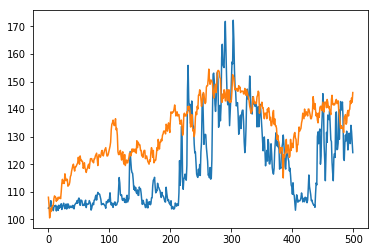

In [135]:
plt.plot(sc_Y.inverse_transform(y_pred_test_lstm)[:500])
plt.plot(sc_Y.inverse_transform(Y_val[:500]))
plt.show()

In [90]:
model_lstm.save('lstmStock_e2000_b100.h5')